In [5]:
# create interactive notebook
%matplotlib inline

In [6]:
# Dependencies and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

In [7]:
# Load files
mouse_data = "data/mouse_drug_data.csv"
trial_data = "data/clinicaltrial_data.csv"

In [8]:
# create dataframe
mouse = pd.read_csv(mouse_data)
trial = pd.read_csv(trial_data)
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [9]:
trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
# combine data into single dataset

merged = pd.merge(trial, mouse, how='left', on='Mouse ID')
merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [11]:
#only keep the data for the drugs that we are analyzing
final_merge = merged.loc[(merged["Drug"] == "Capomulin") | (merged["Drug"] == "Infubinol")
               | (merged["Drug"] == "Ketapril")  | (merged["Drug"] == "Placebo") , :]
final_merge.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [12]:
## Tumor Response to treatment

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_data = final_merge.groupby(['Drug', 'Timepoint'])
drug_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
5,h246,0,45.000000,0,Ketapril
29,c326,0,45.000000,0,Infubinol
30,c139,0,45.000000,0,Infubinol
31,v339,0,45.000000,0,Infubinol
32,a577,0,45.000000,0,Infubinol


In [34]:
# Convert to DataFrame
tumor_mean = pd.DataFrame(drug_data['Tumor Volume (mm3)'].mean())
tumor_mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'}, inplace=True)
tumor_mean
tumor_mean_rfmt = tumor_mean.unstack()
tumor_mean_rfmt

Mean Tumor Volume                                              \
Timepoint                0          5          10         15         20   
Drug                                                                      
Capomulin              45.0  44.266086  43.084291  42.064317  40.716325   
Infubinol              45.0  47.062001  49.403909  51.296397  53.197691   
Ketapril               45.0  47.389175  49.582269  52.399974  54.920935   
Placebo                45.0  47.125589  49.423329  51.359742  54.364417   

                                                                  
Timepoint         25         30         35         40         45  
Drug                                                              
Capomulin  39.939528  38.769339  37.816839  36.958001  36.236114  
Infubinol  55.715252  58.299397  60.742461  63.162824  65.755562  
Ketapril   57.678982  60.994507  63.371686  66.068580  70.662958  
Placebo    57.482574  59.809063  62.420615  65.052675  68.084082

In [14]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_err = pd.DataFrame(drug_data['Tumor Volume (mm3)'].sem()).rename(columns={'Tumor Volume (mm3)':'Tumor Error'})
tumor_err.head()

Tumor Error
Drug      Timepoint             
Capomulin 0             0.000000
          5             0.448593
          10            0.702684
          15            0.838617
          20            0.909731

In [15]:
# Minor Data Munging to Re-Format the Data Frames
# tumor_reformatted = new index -> timepoint, current index -> rows
tumor_err_reformat = tumor_err.unstack(0)
tumor_err_reformat
# tumor_reformatted.head()
# ***where's the rest of the data??***

Tumor Error                              
Drug        Capomulin Infubinol  Ketapril   Placebo
Timepoint                                          
0            0.000000  0.000000  0.000000  0.000000
5            0.448593  0.235102  0.264819  0.218091
10           0.702684  0.282346  0.357421  0.402064
15           0.838617  0.357705  0.580268  0.614461
20           0.909731  0.476210  0.726484  0.839609
25           0.881642  0.550315  0.755413  1.034872
30           0.934460  0.631061  0.934121  1.218231
35           1.052241  0.984155  1.127867  1.287481
40           1.223608  1.055220  1.158449  1.370634
45           1.223977  1.144427  1.453186  1.351726

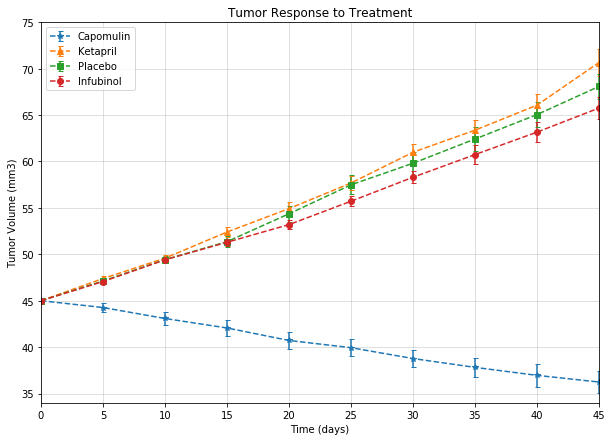

In [16]:
# Generate a Plot of Tumor vol vs. Time for each drug (with Error Bars)

fig, ax = plt.subplots(figsize=(10,7))

plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Capomulin", "Mean Tumor Volume"], yerr=tumor_err.loc["Capomulin", "Tumor Error"], fmt='*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Ketapril", "Mean Tumor Volume"], yerr = tumor_err.loc["Ketapril", "Tumor Error"], fmt = '^--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Placebo", "Mean Tumor Volume"], yerr = tumor_err.loc["Placebo", "Tumor Error"], fmt = 's--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Infubinol", "Mean Tumor Volume"], yerr = tumor_err.loc["Infubinol", "Tumor Error"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Add labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(34,75)

# Plot the graph
plt.show()

# Save the Figure

# Metastatic response to treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metas_sites = pd.DataFrame(drug_data['Metastatic Sites'].mean())
metas_sites.rename(columns={'Metastatic Sites':'Mean Metastatic Sites'},inplace = True)
#metas_sites.reset_index(inplace=True)
metas_sites.head()

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metas_sites_sems = pd.DataFrame(drug_data['Metastatic Sites'].sem())
metas_sites_sems.rename(columns={'Metastatic Sites':'Standard Error Metastatic Sites'},inplace = True)
metas_sites_sems.head()

Standard Error Metastatic Sites
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.074833
          10                                0.125433
          15                                0.132048
          20                                0.161621

In [19]:
# Minor Data Munging to Re-Format the Data Frames

metas_sems_reformat = metas_sites_sems.unstack(0)
metas_sems_reformat.head()

Standard Error Metastatic Sites                              
Drug                            Capomulin Infubinol  Ketapril   Placebo
Timepoint                                                              
0                                0.000000  0.000000  0.000000  0.000000
5                                0.074833  0.091652  0.098100  0.100947
10                               0.125433  0.159364  0.142018  0.115261
15                               0.132048  0.194015  0.191381  0.190221
20                               0.161621  0.234801  0.236680  0.234064

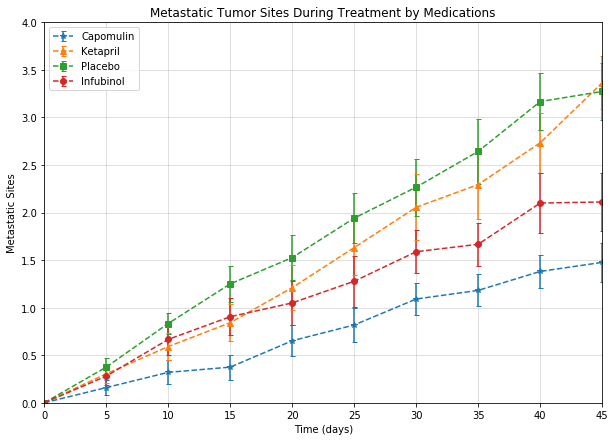

In [50]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots(figsize=(10,7))

plt.errorbar(np.arange(0, 50, 5), metas_sites.loc["Capomulin", "Mean Metastatic Sites"], yerr = metas_sites_sems.loc["Capomulin", "Standard Error Metastatic Sites"], fmt='*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), metas_sites.loc["Ketapril", "Mean Metastatic Sites"], yerr = metas_sites_sems.loc["Ketapril", "Standard Error Metastatic Sites"], fmt = '^--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), metas_sites.loc["Placebo", "Mean Metastatic Sites"], yerr = metas_sites_sems.loc["Placebo", "Standard Error Metastatic Sites"], fmt = 's--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), metas_sites.loc["Infubinol", "Mean Metastatic Sites"], yerr = metas_sites_sems.loc["Infubinol", "Standard Error Metastatic Sites"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Add labels
plt.title('Metastatic Tumor Sites During Treatment by Medications')
plt.xlabel('Time (days)')
plt.ylabel('Metastatic Sites')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(0,4)

# Plot the graph
plt.show()

# Save the Figure

In [51]:
## Survival rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped = final_merge.groupby(['Drug','Timepoint'])
mouse_count = mouse_grouped[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [52]:
# Minor Data Munging to Re-Format the Data Frames

mouse_reformat = mouse_count.unstack(0)
mouse_reformat.head()

Mouse Count                           
Drug        Capomulin Infubinol Ketapril Placebo
Timepoint                                       
0                  25        25       25      25
5                  25        25       23      24
10                 25        21       22      24
15                 24        21       19      20
20                 23        20       19      19

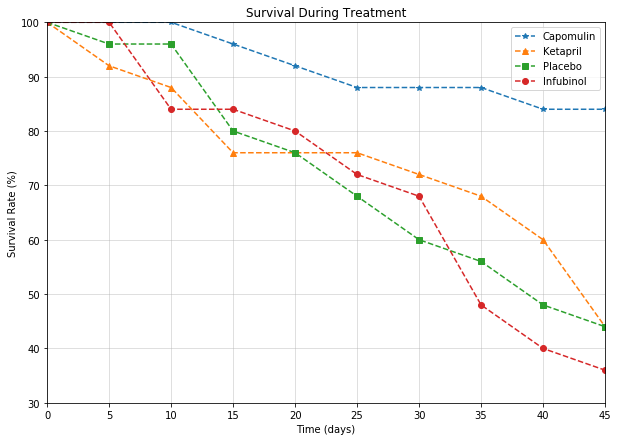

In [53]:
# Generate the Plot (Accounting for percentages)
# Plot shows how mouse survival rate changes over time for each treatment.

fig, ax = plt.subplots(figsize=(10,7))

plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Capomulin", "Mouse Count"]/25,
         marker = '*', label = "Capomulin", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Ketapril", "Mouse Count"]/25,
         marker = '^', label = "Ketapril", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Placebo", "Mouse Count"]/25,
         marker = 's', label = "Placebo", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Infubinol", "Mouse Count"]/25,
         marker = 'o', label = "Infubinol", linestyle ='--')

# Add legend
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = .5)

# Add labels
plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(30,100)

# Plot the graph
plt.show()

# Save the Figure

In [121]:
## Summary bar graph

# take tumor_mean at timepoint 45 divided by tumor_mean at timepoint 0 *100 
#timepoint_0 = drug_data['Timepoint'].min()
#timepoint_45 = drug_data['Timepoint'].max()
#tumor_change = (timepoint_45 - timepoint_0) * 100

tumor_change = [(tumor_mean_rfmt.iloc[:,9] - tumor_mean_rfmt.iloc[:,0]) / tumor_mean_rfmt.iloc[:,0] * 100]
tumor_change_df = pd.DataFrame(tumor_change)
tumor_change1 = tumor_change_df.T
tumor_change1

,0
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


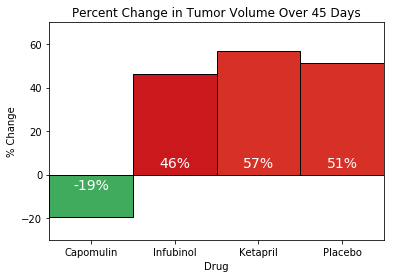

In [142]:
#create basic bar plot structure
axis = range(len(tumor_change1))

bar1 = plt.bar(0, tumor_change1.loc["Capomulin"], color = "#41ab5d", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar2 = plt.bar(1, tumor_change1.loc["Infubinol"], color = "#cb181d", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar3 = plt.bar(2, tumor_change1.loc["Ketapril"], color= "#d73027", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar4 = plt.bar(3, tumor_change1.loc["Placebo"], color= "#d73027", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)

tick_locations = [value + 0.5 for value in axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.xlim(0, 4)
plt.ylim(-30, 70)

#add plot labels
plt.title("Percent Change in Tumor Volume Over 45 Days")
plt.xlabel("Drug")
plt.ylabel("% Change")

def autolabel(bar):
    for bar in bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(bar1)

def autolabel(bar):
    for bar in bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()

# 3 observable trends in data

Based on the data analyzed in this study:
1. Capomulin appears to reduce tumor size in these mice, whereas Infubinol and Ketapril are roughly equal to placebo
2. Capomulin appears to reduce metastatic spread of cancer in these mice
3. Capomulin appears to improve survival rate of these mice